In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r"C:\Users\71589\Desktop\insuranse.csv") # Load CSV file with the file path 
df

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [4]:
df.info() # Display concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


<Axes: >

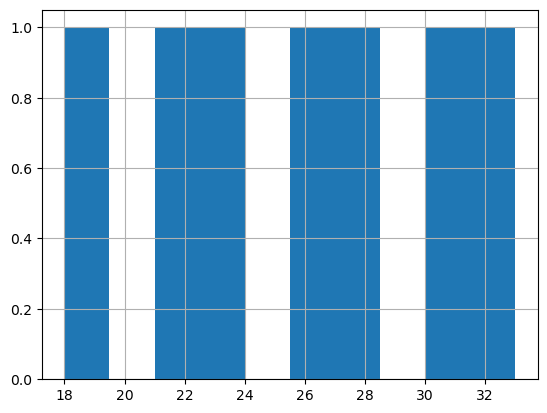

In [6]:
df.Age.hist()

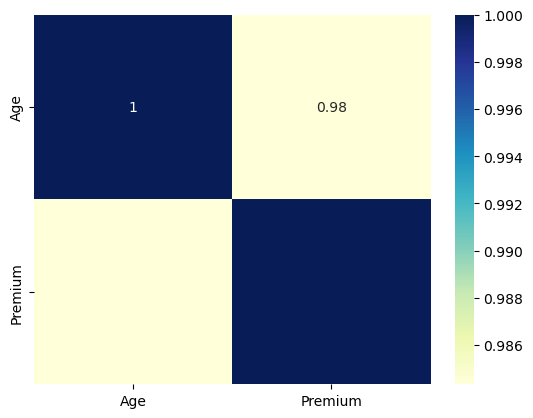

In [7]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


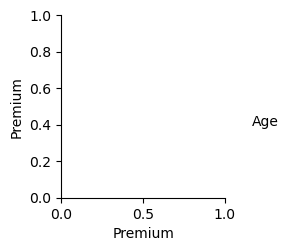

In [8]:
# pairplot with hue sex
sb.pairplot(df, hue="Age")
# to show
plt.show()

In [9]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index([], dtype='object')

In [10]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

In [11]:
df1

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [12]:
X = df1.drop(columns = 'Premium').values # Drop the 'Premium' column and convert the remaining DataFrame to a NumPy array

X

array([[18],
       [22],
       [23],
       [26],
       [28],
       [31],
       [33]], dtype=int64)

In [13]:
y = df1['Premium'].values # Extract the values of the 'Premium' column as a NumPy array

y

array([10000, 15000, 18000, 21000, 24000, 26500, 27000], dtype=int64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the dataset into training and testing sets using train_test_split from sklearn.model_selection

X_test.shape

(3, 1)

In [15]:
reg = LinearRegression() # ols 
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test) # Use the trained LinearRegression model (reg) to predict y values based on X_test


In [19]:
y_pred[:2] # Extract the first two predicted values from y_pred

array([13896.22641509, 17518.86792453])

In [20]:
y_test[:3] # Extract the first three actual (true) values from y_test

array([10000, 15000, 26500], dtype=int64)

In [21]:
np.mean(np.square(y_test - y_pred)) # Calculate the squared differences between true and predicted values

7404829.714014482

In [22]:
np.mean(np.absolute(y_test - y_pred))

2415.0943396226417

In [23]:
min(y), max(y) # Find the minimum and max value in array y

(10000, 27000)

In [24]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.8448347673431191

In [25]:
np.mean(np.abs(y_pred-y_test))

2415.0943396226417

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.8448347673431191, 7404829.714014482, 2415.0943396226417)

In [27]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.8448347673431191